In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [2]:
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
np.random.seed(123)

In [3]:
# 2. 活性的関数
def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsigmoid(x):
    return sigmoid(x)*(a-sigmoid(x))

In [4]:
# 単純パーセプトロン
class Layer(object):
    def __init__(self, input_dim, output_dim,
                 activation, deactivation):
        self.w = np.random.normal(size=(input_dim, output_dim))
        self.b = np.zeros(output_dim)
        self.activation = activation
        self.dactivation = deactivation

    def __call__(self, x):
        return self.forward(x)

    def forward(self, x):
        self._input = x
        self._pre_activation = np.matmul(x, self.w) + self.b
        return self.activation(self._pre_activation)

    def backward(self, delta, W):
        delta = self.dactivation(self._pre_activation) \
                * np.matmul(delta, W.T)
        return delta

    def compute_gradients(self, delta):
        dW = np.matmul(self._input.T, delta)
        db = np.matmul(np.ones(self._input.shape[0]), delta)

        return dW, db

In [5]:
#4. データの準備
M = 2      # 入力データの次元
K = 1      # クラス数
n = 100    # クラスごとのデータ数
N = n * K  # 全データ数

x1 = np.random.randn(n, M) + np.array([0, 0])
x2 = np.random.randn(n, M) + np.array([5, 5])
t1 = np.zeros(n)
t2 = np.ones(n)

x = np.concatenate((x1, x2), axis=0)
t = np.concatenate((t1, t2), axis=0)

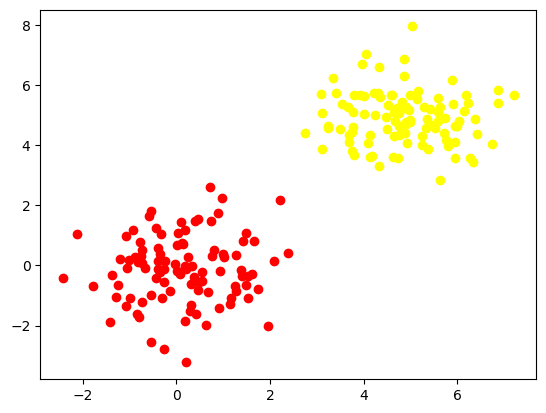

In [6]:
#5. データの表示
plt.scatter(x1[:,0],x1[:,1],color="red")
plt.scatter(x2[:,0],x2[:,1],color="yellow")
plt.show()

In [7]:
model = Layer(2, 1, activation=sigmoid, deactivation=dsigmoid)

In [8]:
def compute_loss(t, y):
    return (-t * np.log(y) - (1 - t) * np.log(1 - y)).sum()

def train_step(x, t):
    y = model(x)
    delta = y - t
    dW, db = model.compute_gradients(delta)
    model.w = model.w - 0.1 * dW
    model.b = model.b - 0.1 * db
    loss = compute_loss(t, model(x))
    return loss

In [9]:
epochs = 300
batch_size = 1
n_batches = x.shape[0] // batch_size

for epoch in range(epochs):
    train_loss = 0.
    x_, t_ = shuffle(x, t)

    for n_batch in range(n_batches):
        start = n_batch * batch_size
        end = start + batch_size

        train_loss += train_step(x_[start:end],
                                 t_[start:end])

    if epoch % 10 == 0 or epoch == epochs - 1:
        print('epoch: {}, loss: {:.3f}'.format(
            epoch+1,
            train_loss
        ))

epoch: 1, loss: 35.767
epoch: 11, loss: 2.716
epoch: 21, loss: 1.683
epoch: 31, loss: 1.279
epoch: 41, loss: 1.046
epoch: 51, loss: 0.908
epoch: 61, loss: 0.799
epoch: 71, loss: 0.711
epoch: 81, loss: 0.657
epoch: 91, loss: 0.604
epoch: 101, loss: 0.569
epoch: 111, loss: 0.531
epoch: 121, loss: 0.499
epoch: 131, loss: 0.472
epoch: 141, loss: 0.450
epoch: 151, loss: 0.425
epoch: 161, loss: 0.408
epoch: 171, loss: 0.395
epoch: 181, loss: 0.376
epoch: 191, loss: 0.361
epoch: 201, loss: 0.348
epoch: 211, loss: 0.341
epoch: 221, loss: 0.329
epoch: 231, loss: 0.319
epoch: 241, loss: 0.309
epoch: 251, loss: 0.300
epoch: 261, loss: 0.291
epoch: 271, loss: 0.285
epoch: 281, loss: 0.276
epoch: 291, loss: 0.270
epoch: 300, loss: 0.265


[[2.09501983]
 [2.29802592]] [-11.61552189]


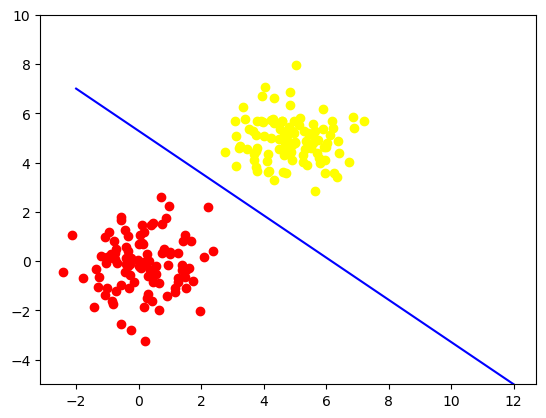

In [10]:
print(model.w, model.b)
rx = np.array([-2,12])
ry = np.array([0,0])
for i in range(rx.size):
    ry[i] = (0.5-model.b[0]-model.w[0][0]*rx[i])/model.w[1][0]
plt.scatter(x1[:,0],x1[:,1],color="red")
plt.scatter(x2[:,0],x2[:,1],color="yellow")
plt.plot(rx,ry,color="blue")
plt.ylim(-5,10)
plt.show()